## 등식 제한 조건이 있는 최적화 문제

현실의 최적화 문제에서는 여러가지 제한 조건이 있는 최적화 문제가 많다.
가장 간단한 경우는 등식 제한이 있는 경우이다.


$$ x^* = \arg \min_{x}f(x) \;\; (x \in \mathbf{R}^N)$$
$$ g_j(x) = 0 \;\; (j = 1, \cdots, M) $$

목적 함수가 다음과 같은 경우,

$$ f(x_1, x_2) = x_1^2 + x_2^2 $$

그리고 등식(방정식) 제한 조건이 있는 경우를 생각해보자.

$$ g(x_1, x_2) = x_1 + x_2 -1 = 0 $$

이 문제는 $g(x_1, x_2) = 0$으로 정의되는 직선 상에서 가장 $f(x_1, x_2)$ 값이 작아지는 점을 찾는 문제가 된다.

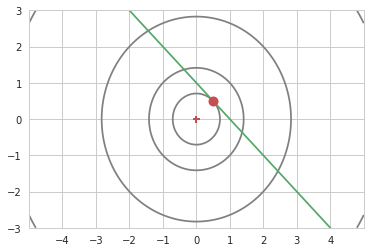

In [3]:
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)
# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1
%matplotlib inline
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.show()

This kind of constraind optimization problems are optimizable by Langrange multiplier

Langrange multiplelier uses $h(x, \lambda) $ rather than $f(x)$ as target function
$$  h(x,\lambda) = f(x) + \sum_{j=1}^{M}\lambda_jg_j(x) $$

$h$ should fullfill these conditions

$$\begin{eqnarray}
\dfrac{\partial h(x, \lambda)}{\partial x_1} 
&=& \dfrac{\partial f}{\partial x_1} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_1} = 0 \\
\dfrac{\partial h(x, \lambda)}{\partial x_2} 
&=& \dfrac{\partial f}{\partial x_2} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_2} = 0 \\
\vdots & & \\
\dfrac{\partial h(x, \lambda)}{\partial x_N} 
&=& \dfrac{\partial f}{\partial x_N} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_N} = 0 \\
\dfrac{\partial h(x, \lambda)}{\partial \lambda_1} &=& g_1 = 0 \\
\vdots & & \\
\dfrac{\partial h(x, \lambda)}{\partial \lambda_M} &=& g_M = 0 
\end{eqnarray}$$


위 $N + M$개의 연립 방정식을 풀면 $N+M$개의 미지수를 구할 수 있다.
$x_1, x_2, \ldots, x_N, , \lambda_1, \ldots , \lambda_M$ 여기서 $x$값들이 제한 조건을 만족하는 최소값 위치를 나타낸다.

ex)

$$f(x_1, x_2) = - \log{x_1} - \log{x_2} \\ x_1, x_2 > 0
\\ \text{s.t.} \;\; x_1 + x_2 = 1 $$

제약 조건이 g가 된다.

$$\text{s.t} \;\;x_1 + x_2 - 1 = 0 = g(x_1, x_2) $$


라그랑지 승수를 적용하여 미분이 0인 위치를 구한다.

$$ h = f + \lambda g = -\log x_1 - \log x_2 + \lambda(x_1 + x_2 -1) $$

$$
\begin{eqnarray}
\dfrac{\partial h}{\partial x_1} 
&=& -\dfrac{1}{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&=& -\dfrac{1}{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&=& x_1 + x_2 - 1 = 0 
\end{eqnarray}$$

$$x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = 2$$

### SciPy : optimize pakage
- 제한 최적화 문제를 풀기위해 `fmin_slsqp` 명령을 제공한다.
    
    - slsqp : Sequential Least SQuares Programming
    - eqcons : 제약조건, s.t(subject to)

In [6]:
def f1logs(x):
    return -np.log(x[0]) - np.log(x[1])
def eq_constraint(x):
    return x[0] +x[1] -1

sp.optimize.fmin_slsqp(f1logs, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3862943611198901
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([ 0.5,  0.5])

---

### 부등식 제한 조건이 있는 최적화 문제

등식 제한 조건과 동일한 목적함수 $h$를 가지고 최적화한다.

다만 몇가지 다른점이 있다. 제한 조건의 범위 $g_j(x) \leq 0 \;\;(j = 1, \cdots, M)$가 달라진다.

그리고 KKT 조건이라고 하며 3개의 필요 조건이 있다.


(1) 모든 독립 변수에 대한 미분이 0
- 이것은 등식 제한 조건과 동일하다.

$$ \dfrac{\partial h(x, \lambda)}{\partial x_i} = 0$$

(2) **모든 라그랑지 승수와 부등식의 곱이 0**

$$\lambda_j \cdot \dfrac{\partial h(x, \lambda)}{\partial \lambda_j} = \lambda \cdot g_j = 0$$

(3) 음수가 아닌 라그랑지 승수

$$ \lambda_j \geq 0 $$

마지막 조건은 KKT 조건이 실제 부등식 제한 조건이 있는 문제임을 보장하기 위한 조건이다.

두번째 조건은 목적함수에 대한 미분값이 반드시 0이 될 필요는 없다는 것을 말한다. $g$ 가 0이 아닐 경우, 라그랑지 승수인 $\lambda$ 값이 0이 되어도 성립한다.

그 이유는 부등식 제한 조건이 있는 최적화 문제를 풀 경우, 그 제한 조건은 실제로 다음 두 가지 경우 중 하나가 된다.
1.  최적화 결과에 전혀 영향을 주지 않는 쓸모 없는 제한 조건
1. 최적화 결과에 영향을 주는 **등식인** 제한 조건


- $h(x^*, \lambda^*) $ 에서 $\lambda^* = 0$이면 $h(x^*, \lambda^*) = f(x^*)$이므로 제한 조건이 의미가 없게 된다.
- $g(x^*) = 0$ 이면 이 조건은 등식 제한 조건이 된다.

### SciPy

`fmin_slsqp` 명령은 부등식 제한 조건이 있는 경우에도 사용이 가능하다.
- 다만 ieqcons 인수에 들어가는 부등호의 부호가 0 또는 양수이어야 한다.

In [14]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2)** 2)
# def eq_constraint(x):
#     return x[0] +x[1] -1
def ieq_constraint(x):
    return np.atleast_1d(1 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([  9.99999982e-01,   1.79954011e-08])

---

# LP, QP 

### Linear Programming 문제

방정식이나 부등식 제한 조건을 가지는 선형 모형(linear model, linear combination)의 값을 최소화하는 문제를 LP 문제라고 한다.

$$\begin{eqnarray}
\min_x c^Tx \\
Ax = b \\
x \geq 0
\end{eqnarray}$$

두번째 식이 제한조건, 마지막 식은 벡터 x의 모든 원소가 0 이상이어야 한다는 것을 의미한다.

이러한 형태를 LP문제 기본형(standard form)이라고 한다. 답이 존재하는 경우 **실현 가능(feasible)** 하다고 한다. 불가능한 경우는 **실현 불가능(infeasible)**

ex)
$$\min_x \begin{bmatrix} -4 & -3 & 0 & 0 & 0 \end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\
\end{bmatrix}$$


$$\begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
2 & 1 & 0 & 1 & 0 \\
3 & 4 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{bmatrix}=
\begin{bmatrix}
100 \\ 150 \\ 360
\end{bmatrix}$$

$$\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5
\end{bmatrix}\geq
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 0
\end{bmatrix}$$

### SciPy

`scipy.optimize.linprog` 명령으로 LP문제를 풀 수 있다. 
- 인수 이름 `A_eq`, `b_eq`는 반드시 써주어야 한다.

$$\begin{eqnarray}
\min_x c^Tx \\
\text{s.t.} \;\;Ax = b \\
x \geq 0
\end{eqnarray}$$

In [1]:
A = np.array([[1, 1, 1, 0, 0],
              [2, 1, 0, 1, 0],
              [3, 4, 0, 0, 1]])
b = np.array([100, 150, 350])
c = np.array([-4, -3, 0, 0, 0])

sp.optimize.linprog(c, A_eq=A, b_eq=b) # 이와 같은 경우는 feasible

     fun: -350.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 50.,  50.,   0.,   0.,   0.])

LP 문제는 여러가지 변형이 존재한다. 
- CP (Conic Programming) 문제 : 부등식 제한 조건 대신 특정한 기저 벡터들의 양수 선형 조합에 속해야 한다는 조건
- IP (Integer Programming) 문제 : LP 문제에 $x$의 모든 원소가 정수이어야 한다는 조건
- MIP (Mixed Integer Programming) 문제 : 모든 $x$의 원소가 아니라 일부 원소만 정수이어야 하는 조건

---

### Quadratic Programming 문제

방정식이나 부등식 제한 조건을 가지는 일반화된 이차형식(quadratic form)의 값을 최소화하는 문제를 QP문제라고 한다.

$$\begin{eqnarray}
\min_x \dfrac{1}{2}x^TQx + c^Tx \\
Ax = b \\
x \geq 0
\end{eqnarray}$$

LP문제와 같은 형식이다.

잔차 제곱합을 최소화하기 위한 데이터 분석 모형은 부가 조건이 있는 경우 대부분 QP 문제가 된다.